In [10]:
#coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_finance import candlestick_ochl  
#从文件里得到数据
df = pd.read_csv('./data/BCHAIN-MKPRU_test.csv',encoding='gbk')

In [11]:
df.columns

Index(['锘緿ate', '棰勬祴缁撴灉_Y'], dtype='object')

In [21]:
import numpy as np

In [12]:
df.columns = ['Date','exchange rate']

<AxesSubplot:>

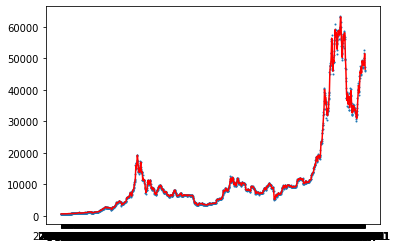

In [13]:
#show_gold('./data/LBMA-GOLD.csv')
#fig = plt.figure()
data = pd.read_csv('./data/BCHAIN-MKPRU_test.csv')
x_data = data.iloc[1:, 0]
y_data = data.iloc[1:, 1]
plt.scatter(x_data, y_data, s=1)

#df['exchange rate'].rolling(window=3).mean().plot(color="red",label='3天均线')
#df['exchange rate'].rolling(window=5).mean().plot(color="blue",label='5天均线')
df['exchange rate'].rolling(window=3).mean().plot(color="red",label='3天均线')
#plt.legend('10 day average',loc='upper left')

In [14]:
profit = 0
Bitcoin = 128/620

In [15]:
ls1=[]
ls2=[]
ls3=[]

In [16]:
#!/usr/bin/env python
#coding=utf-8
temp = 0
import pandas as pd
#从文件里得到数据
df = pd.read_csv('./data/BCHAIN-MKPRU_test.csv',encoding='gbk')
maIntervalList = [30,3]
df.columns = ['Date','exchange rate']
#虽然在后文里只用到了5日均线，但这里演示设置3种均线
for maInterval in maIntervalList:
    df['MA_' + str(maInterval)] = df['exchange rate'].rolling(window=maInterval).mean()
cnt=0    
print(Bitcoin)
while cnt<=len(df)-1:
     try:
        '''
        if (df.iloc[cnt]['exchange rate']>df.iloc[cnt+1]['exchange rate'] and df.iloc[cnt+1]['exchange rate']>df.iloc[cnt+2]['exchange rate']) \
         or (df.iloc[cnt]['MA_3']>df.iloc[cnt+1]['MA_3'] and df.iloc[cnt+1]['MA_3']>df.iloc[cnt+2]['MA_3']) \
         or (df.iloc[cnt+1]['MA_3']<df.iloc[cnt]['exchange rate'] and df.iloc[cnt+2]['MA_3']>df.iloc[cnt+1]['exchange rate']):
        '''
        if df.iloc[cnt]['exchange rate']>df.iloc[cnt+1]['exchange rate'] and df.iloc[cnt+1]['exchange rate']>df.iloc[cnt+2]['exchange rate']:
            #规则2,5日均线连续三天下跌
            if df.iloc[cnt]['MA_3']>df.iloc[cnt+1]['MA_3'] and df.iloc[cnt+1]['MA_3']>df.iloc[cnt+2]['MA_3']:
                #规则3，第3天，收盘价下穿5日均线
                if df.iloc[cnt+1]['MA_3']<df.iloc[cnt]['exchange rate'] and df.iloc[cnt+2]['MA_3']>df.iloc[cnt+1]['exchange rate']:     
                  #  print("Sell Point on:" + df.iloc[cnt]['Date'])
                    print("Sell Point on:" + df.iloc[cnt]['Date'])
                    temp = Bitcoin*0.8
                    if Bitcoin>0 :
                         #temp*df.iloc[cnt]['exchange rate']*0.01
                         Bitcoin = Bitcoin-temp
                         profit =profit +  temp*df.iloc[cnt]['exchange rate']
                         profit = profit - temp*df.iloc[cnt]['exchange rate']*0.02
                         #print(temp)
                         print(Bitcoin)
                         print(profit)
                         ls1.append(1)
                    
       #规则1，收盘价连续三天上扬
    
     #   elif (df.iloc[cnt]['exchange rate']<df.iloc[cnt+1]['exchange rate'] and df.iloc[cnt+1]['exchange rate']<df.iloc[cnt+2]['exchange rate']) \
     #       or  (df.iloc[cnt]['MA_3']<df.iloc[cnt+1]['MA_3'] and df.iloc[cnt+1]['MA_3']<df.iloc[cnt+2]['MA_3']) \
      #      or (df.iloc[cnt+1]['MA_3']>df.iloc[cnt]['exchange rate'] and df.iloc[cnt+2]['MA_3']<df.iloc[cnt+1]['exchange rate']):
    
        elif df.iloc[cnt]['exchange rate']<df.iloc[cnt+1]['exchange rate'] and df.iloc[cnt+1]['exchange rate']<df.iloc[cnt+2]['exchange rate']:
            #规则2,5日均线连续三天上扬
            if df.iloc[cnt]['MA_3']<df.iloc[cnt+1]['MA_3'] and df.iloc[cnt+1]['MA_3']<df.iloc[cnt+2]['MA_3']:
              #规则3，第3天，收盘价上穿5日均线
                if df.iloc[cnt+1]['MA_3']>df.iloc[cnt]['exchange rate'] and df.iloc[cnt+2]['MA_3']<df.iloc[cnt+1]['exchange rate']:     
                    print("Buy Point on:" + df.iloc[cnt]['Date'])
                    if profit>0:
                        temp = profit *0.2
                        profit = profit - temp
                        Bitcoin = Bitcoin + temp*(1/df.iloc[cnt]['exchange rate'])
                        profit = profit - temp*0.02
                         #print(temp)
                        print(Bitcoin)
                        print(profit)
                        ls2.append(2)
     except: 
         pass
     cnt=cnt+1
     #ls1.append(profit)
     #ls2.append(Bitcoin)
     ls3.append(profit+Bitcoin*df.iloc[cnt-1]['exchange rate'])
     
    
    
total_profit=profit+Bitcoin*df.iloc[cnt-1]['exchange rate']
print(total_profit)


0.2064516129032258
Sell Point on:9/16/16
0.04129032258064516
99.51113602477419
Buy Point on:9/21/16
0.07388615942957538
79.21086427572025
Buy Point on:9/25/16
0.0996515946428971
63.05184796347332
Buy Point on:2010/6/16
0.1198485477514545
50.18927097892476
Buy Point on:10/16/16
0.13548366661977967
39.95065969922411
Buy Point on:10/21/16
0.14764395566742838
31.800725120582392
Buy Point on:2011/3/16
0.15655391997321122
25.313377195983584
Sell Point on:2011/6/16
0.03131078399464224
114.42313960482991
Sell Point on:11/20/16
0.006262156798928446
132.7587549513832
Buy Point on:11/25/16
0.04213646824372293
105.67596894130102
Buy Point on:11/27/16
0.06986268942368579
84.1180712772756
Buy Point on:2012/11/16
0.09119986260886855
66.95798473671138
Buy Point on:12/15/16
0.10789257870813192
53.298555850422254
Buy Point on:12/22/16
0.11953118386112144
42.42565045693612
Buy Point on:12/24/16
0.12849494850784385
33.77081776372115
Buy Point on:12/26/16
0.1353997121362784
26.88157093992203
Sell Point on:

Buy Point on:2005/6/19
0.3689968498646909
132.31007881229402
Buy Point on:2005/8/19
0.3727622058811468
105.31882273458604
Sell Point on:2005/12/19
0.07455244117622933
2472.908019146744
Buy Point on:5/22/19
0.13417397427444494
1968.4347832408084
Sell Point on:5/30/19
0.026834794854888988
2858.812044272245
Buy Point on:2006/8/19
0.09860045651295661
2275.6143872407074
Buy Point on:2006/10/19
0.15271041648336484
1811.3890522436031
Buy Point on:2006/12/19
0.19344085825963125
1441.865685585908
Buy Point on:6/17/19
0.22280582817933967
1147.7250857263828
Sell Point on:6/25/19
0.04456116563586793
3233.3667698059653
Buy Point on:2007/3/19
0.10128358963141494
2573.7599487655484
Sell Point on:7/17/19
0.02025671792628299
3421.0622211638643
Sell Point on:7/22/19
0.004051343585256596
3575.8309950830358
Buy Point on:7/27/19
0.07672462415310716
2846.3614720860965
Buy Point on:2008/2/19
0.12623035106240277
2265.703731780533
Sell Point on:2008/9/19
0.025246070212480543
3348.4482519248586
Sell Point on:8/

In [17]:
profit

18381.31344774941

In [18]:
Bitcoin

0.025960964921423274

In [19]:
total_profit

19584.877021598702

In [14]:
output_excel = {'美元数量':[], '比特币数量':[],'投资比特币总资产':[]}

In [57]:
x_data = data.iloc[1:, 0]

In [58]:
x_data

1       2009/12/16
2          9/13/16
3          9/14/16
4          9/15/16
5          9/16/16
           ...    
1816     2009/1/21
1817     2009/2/21
1818     2009/3/21
1819     2009/4/21
1820     2009/5/21
Name: Date, Length: 1820, dtype: object

In [59]:
ls3

[128.13635303225806,
 127.15482838709677,
 127.21550451612903,
 127.63213212903227,
 127.59529290322581,
 124.89662990864515,
 124.67046918606451,
 124.59707357316128,
 124.73739254090322,
 124.80572389574193,
 124.32396074519121,
 124.54808628234329,
 124.68607385710919,
 124.64061539752015,
 124.32377194041726,
 124.64917924014392,
 124.91908558423421,
 125.08784555976194,
 124.65827145163914,
 124.57838674730961,
 124.68904984316053,
 125.19982405666218,
 125.04622108867962,
 125.16475666050734,
 125.50763786735462,
 125.01909675364564,
 126.81943766825842,
 127.00849875233635,
 127.2084300996953,
 127.91626760757018,
 127.91626760757018,
 127.91626760757018,
 127.91626760757018,
 127.76731983242468,
 126.8167051213697,
 126.93210850642234,
 128.17202792659324,
 129.08715235277654,
 129.03141843683915,
 129.45505824948256,
 128.81278472548595,
 133.62938825562003,
 134.59520119161854,
 134.59520119161854,
 135.88143104020645,
 135.88143104020645,
 135.99329200677835,
 137.1925019843

In [61]:
len(ls3)

1820

In [60]:
ls3.pop()

19584.877021598702

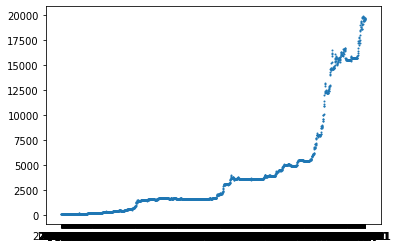

In [62]:
plt.scatter(x_data, ls3, s=1)

In [24]:
output_excel['美元数量'] = ls1
output_excel['比特币数量'] = ls2
output_excel['投资比特币总资产'] = ls3
#output_excel['kernel'] = kernel_list
#output_excel['score'] = score_list
output = pd.DataFrame(output_excel)
output.to_excel('3_score.xlsx', index=False)

In [8]:
len(ls1)

122

In [9]:
len(ls2)

183